In [104]:
#importing the libraries

import pandas as pd
import numpy as np
from scipy.io import loadmat
import scipy.io as io
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras



In [3]:
# uploading the files
from google.colab import files
files.upload()

Saving WLDataCW (1).mat to WLDataCW (1).mat


In [4]:
#loading the dataset

mat= loadmat(r'WLDataCW (1).mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])

In [5]:
#assigning datapoints and cls labels
data_pts = mat['data']
cls_labls = mat['label']
print(data_pts.shape)
print(cls_labls.shape)

(62, 512, 360)
(1, 360)


In [6]:
#reshaping the arrays
x =np.rollaxis(data_pts,2,0)
y_ = np.rollaxis(cls_labls,1,0)
y= y_.flatten()
print(x.shape)
print(y.shape)


(360, 62, 512)
(360,)


In [ ]:
for n in range(512):
  data= x[:,:,n]
  print(data)

In [32]:
#creating the dataframe with 360 raws and 63 coloumns with labels included
df = pd.DataFrame(data)
#assigning the labels
df['label']= y
df

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,label
0,-3.362456,3.596833,8.323660,-4.004828,-1.472134,3.714885,13.737923,-0.913710,0.266750,-3.042869,...,-2.684255,4.683746,13.240414,5.548093,15.444119,-0.521052,19.832529,12.131377,17.854654,0
1,12.579647,15.502164,3.991107,13.868857,8.440236,13.391046,8.226375,22.309374,-12.167016,-2.735142,...,-13.785090,-17.890724,-26.001862,-0.468893,0.016655,-7.948845,-8.792702,-5.919636,-22.282345,0
2,1.277068,8.415224,-11.774738,-31.223522,-1.356515,-0.449841,0.730077,23.432961,0.346550,2.665467,...,-2.411576,-4.047780,-13.005358,4.241107,13.812962,2.445725,-3.371203,-8.124169,-11.228072,0
3,-14.394360,-9.410032,-32.955605,-21.303513,-1.271285,-1.407308,9.426048,-0.823189,-6.302212,-4.798160,...,1.396790,-6.853747,-3.879845,-6.115176,-12.984893,5.214228,0.696291,1.420030,-13.764502,0
4,-33.929226,-33.737457,-42.875732,-10.908735,-8.217500,-3.506203,13.825042,-1.425211,-1.301115,-2.035506,...,-3.832620,-3.555815,-3.242592,-1.634755,15.554104,-7.274704,5.880332,-2.542328,5.491176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,7.381953,7.740952,2.794471,8.394994,16.428465,10.392040,4.318801,-1.512521,7.800765,9.299529,...,5.237462,15.670440,10.735346,10.025942,-1.376872,4.005838,5.825343,1.136622,8.822712,1
356,-10.743827,-7.791761,-0.062055,-18.667692,-8.980803,-10.347117,-12.026600,5.783433,-13.175392,-11.429005,...,2.154408,6.771527,5.520761,-18.025486,-4.703998,5.054066,1.903580,2.451541,8.307706,1
357,24.213781,28.038839,30.083735,7.906794,16.075668,13.887076,19.467886,11.003078,11.878263,13.338130,...,12.741323,11.218057,9.138403,4.458954,8.247229,14.012955,2.964721,9.013945,7.063335,1
358,-1.038762,-5.467292,8.773671,11.661165,-0.171522,-0.649494,-5.640747,17.967089,1.222247,-4.120433,...,4.182127,2.147061,2.717524,2.729948,-7.111262,0.835374,-5.636830,3.063553,-1.096807,1




Applying logistic regression from scratch

In [100]:
from IPython.core.display import display_javascript

#craeting the sigmoid function
def fun_sigmoid(s):
  #'''calculating the sigmoid of s'''
    return 1.0/(1 + np.exp(-s))

#creating the loss function
def loss_(y, y_hat):
  #''' y_hat is the predicted labels and y is the true label'''
    loss_ = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss_

def gradient_decent(X, y, y_hat):
  #'''calculating the gradient decent 
                  #of the sigmoid function'''
    g = X.shape[0]
    gf = (1/m)*np.dot(X.T, (y_hat - y))
    gf_1 = (1/m)*np.sum((y_hat - y)) 
    return gf,gf_1

#normalising the data for better performance
def normalize_raws(X):
  #'''The fuction will normalize the each and every raws of the matrix'''
    g, j = X.shape           
    for i in range(j):
        X = (X - X.mean(axis=0))/X.std(axis=0)       
    return X  #a numpy matrix is returned


In [92]:
from sys import base_exec_prefix

def train_data(X, y, bis, epoch_s, lern_r):
  #'''training the dataset and updating the parameters'''
    g, n = X.shape
    wei_gt = np.zeros((n,1)) #assigning values to weight and bias
    b_ias = 0
    y = y.reshape(g,1)
    x = X
    los_strd = []
    for epoch in range(epoch_s):
        for i in range((g-1)//bis + 1):
            start_i = i*bis
            end_i = start_i + bis
            x_b = X[start_i:end_i]
            y_b = y[start_i:end_i]
            
            y_hat = sigmoid(np.dot(x_b, wei_gt) + b_ias)
            gf, gf_1 = gradients(x_b, yb, y_hat)
            wei_gt -= lr*gf #updating the parametrs
            b_ias -= lr*gf_1
        
        l = loss_(y, sigmoid(np.dot(X, wei_gt) + b_ias))
        los_strd.append(l)
        
    return wei_gt, b_ias, los_strd #returning the bias ,loss and weight

In [102]:
def fun_predict(X):
  #'''function to store predictions'''
    x = X
    p = sigmoid(np.dot(X, wei_gt) + b_ias) 
    list_pred = []
    list_pred = [1 if i > 0.5 else 0 for i in p]
    return np.array(list_pred)

def mdl_accrsy(y, y_hat):
  #'''calculating the accuracy of the model'''
    mdl_accrsy = np.sum(y == y_hat) / len(y)
    return mdl_accrsy
wei_gt, b_ias, lern_r = train(df, y, bs=100, epochs=1000, lr=0.01)
mdl_accrsy(y, fun_predict(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


0.8833333333333333

DEEP LEARNING MODEL

In [105]:
from sklearn.model_selection import train_test_split

def preprocess_inputs(df):
    df = df.copy()
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)
    return X_train, X_test, y_train, y_test

In [106]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [ ]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims) 
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten) 
model = tf.keras.Model(inputs=inputs, outputs=outputs) #creating the model
print(model.summary()) #printing the model summery

In [108]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
8/8 [==============================] - 4s 243ms/step - loss: 1.8966 - accuracy: 0.5348 - val_loss: 0.7822 - val_accuracy: 0.5000
Epoch 2/50
8/8 [==============================] - 1s 164ms/step - loss: 0.9924 - accuracy: 0.6217 - val_loss: 1.0368 - val_accuracy: 0.5690
Epoch 3/50
8/8 [==============================] - 1s 163ms/step - loss: 0.8695 - accuracy: 0.5739 - val_loss: 1.3308 - val_accuracy: 0.5517
Epoch 4/50
8/8 [==============================] - 1s 161ms/step - loss: 0.7340 - accuracy: 0.6957 - val_loss: 0.7679 - val_accuracy: 0.5862
Epoch 5/50
8/8 [==============================] - 1s 160ms/step - loss: 0.7033 - accuracy: 0.6783 - val_loss: 0.7295 - val_accuracy: 0.6207
Epoch 6/50
8/8 [==============================] - 1s 160ms/step - loss: 0.5517 - accuracy: 0.7348 - val_loss: 0.6002 - val_accuracy: 0.6034
Epoch 7/50
8/8 [==============================] - 1s 162ms/step - loss: 0.5598 - accuracy: 0.7087 - val_loss: 0.8208 - val_accuracy: 0.6034
Epoch 8/50
8/8 [====

In [109]:
#calculating the test accuracy

model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 66.667%


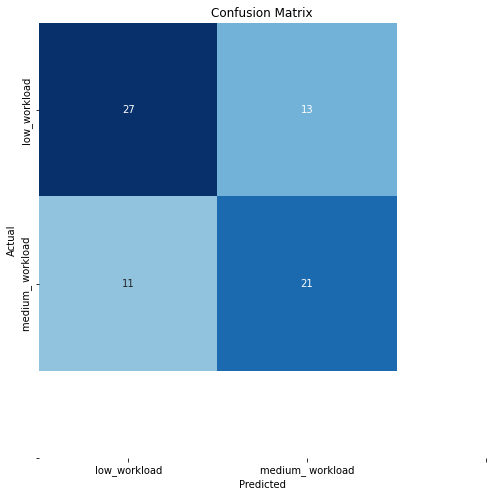

Classification Report:
----------------------
                   precision    recall  f1-score   support

    low_workload       0.71      0.68      0.69        40
medium_ workload       0.62      0.66      0.64        32

        accuracy                           0.67        72
       macro avg       0.66      0.67      0.66        72
    weighted avg       0.67      0.67      0.67        72



In [110]:
#creating the confusion matrix
#calculating the precision,recall and F1 score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))

cm = confusion_matrix(y_test, y_pred)

label_mapping = {'low_workload': 0, 'medium_ workload': 1}
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

Deep learning code source :https://www.kaggle.com/code/gcdatkin/eeg-emotion-prediction/notebook
